# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file="./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of Validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test =  len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
                   

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_valid))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)





Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

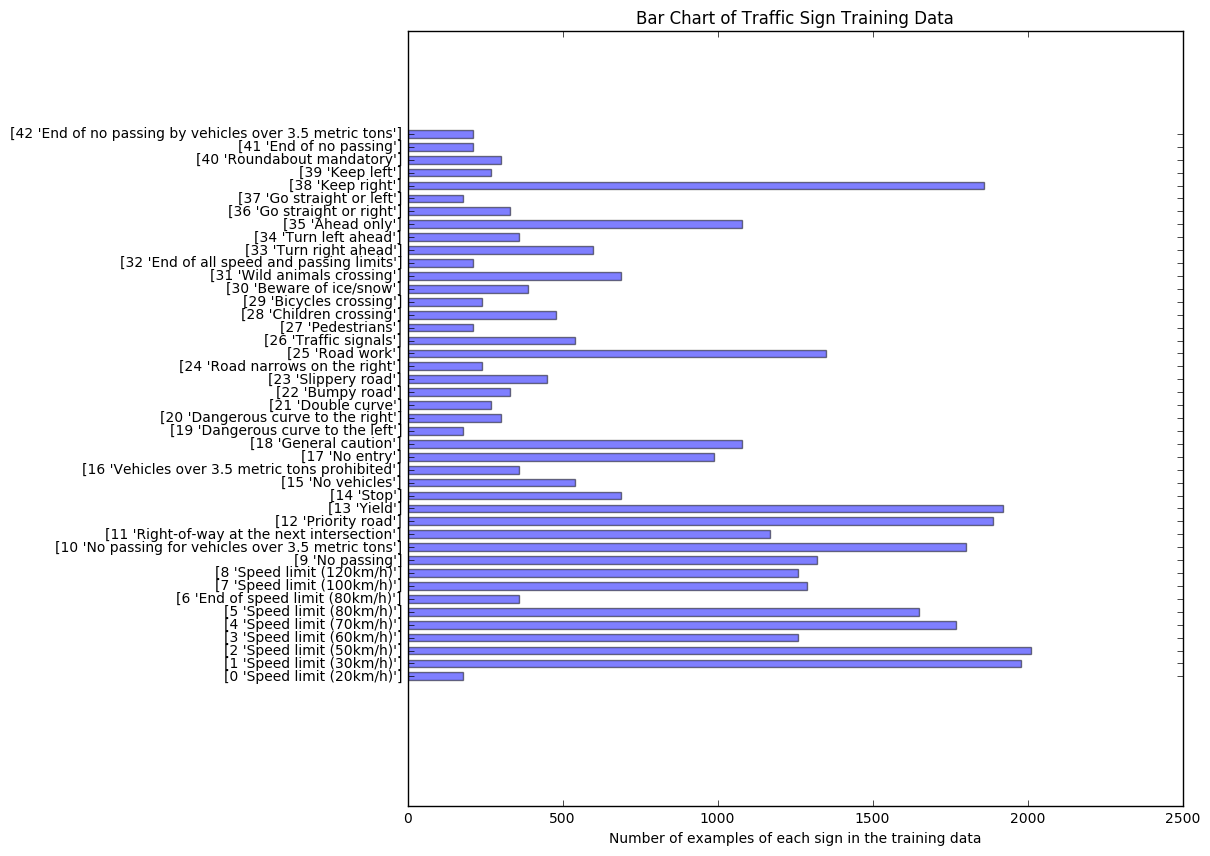

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

#read in the sign labels from the CSV file
sign_labels=pd.read_csv('signnames.csv', sep=',',header=0)


objects = sign_labels.values
y_pos = np.arange(len(objects))
count = np.bincount(y_train)
width = 0.6
fig = plt.figure(figsize=(10,10))

plt.barh(y_pos, count, width,  align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of examples of each sign in the training data')
plt.title('Bar Chart of Traffic Sign Training Data')
plt.show()




[18 'General caution']


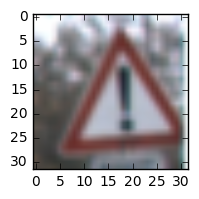

In [4]:
#code to print an example of a pictures with a certain label 
t= True
i=0
while t:
    if y_valid[i] == 18:
        t = False
    else:
        i+=1
image = X_valid[i].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image, cmap="gray")
print(sign_labels.values[y_valid[i]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt

def normalize(image_data): #takes image data in greyscale format and normalizes between 0.1 and 0.9
    image_data = np.add(0.1,image_data*.8/255)
    return image_data

def convert_to_grayscale(image_data):
    # takes in image_data in 3 channel RGB format and outputs single channel greyscale image data
    image_data = np.matmul(image_data, [ 0.299, 0.587,0.114])
   
    return image_data

# convert the training data from RGB to greyscale then normalizes and reshapes 
X_train_data = np.copy(X_train)
X_train_data = convert_to_grayscale(X_train_data)
X_train_data = normalize(X_train_data)
X_train_data = X_train_data.reshape([len(X_train_data),32,32,1])

# convert the test data from RGB to greyscale then normalizes and reshapes 
X_test_data = np.copy(X_test)
X_test_data = convert_to_grayscale(X_test_data)  
X_test_data = normalize(X_test_data) 
X_test_data = X_test_data.reshape([len(X_test_data),32,32,1])

# convert the validation data from RGB to greyscale then normalizes and reshapes 
X_valid_data = np.copy(X_valid)
X_valid_data = convert_to_grayscale(X_valid_data)
X_valid_data = normalize(X_valid_data)
X_valid_data = X_valid_data.reshape([len(X_valid_data),32,32,1])


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

X_train_data, y_train = shuffle(X_train_data, y_train)
EPOCHS = 25
BATCH_SIZE = 128


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
       
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x50.
    #took Lenet Lab from 6 hidden layers to 50
    filter_weights =  tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 50), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    filter_bias = tf.Variable(tf.zeros(50))
    strides = [1, 1, 1, 1] # (batch, height, width, depth)
    padding = 'VALID'
    conv = tf.nn.conv2d(x, filter_weights, strides, padding) 
    conv = tf.nn.bias_add(conv, filter_bias)
    
    
    # Relu activation layer 1
    conv =tf.nn.relu(conv) 
    
    #Pooling. Input = 28x28x50. Output = 14x14x50.
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Layer 2: Convolutional. Output = 10x10x16.
    filter_weights2 =  tf.Variable(tf.truncated_normal(shape=(5, 5, 50, 16), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    filter_bias2 = tf.Variable(tf.zeros(16))
    strides2 = [1, 1, 1, 1] # (batch, height, width, depth)
    padding = 'VALID'
    conv = tf.nn.conv2d(conv, filter_weights2, strides2, padding)
    conv = tf.nn.bias_add(conv, filter_bias2)
    # Relu Activation.
    conv =tf.nn.relu(conv)
   
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv = tf.contrib.layers.flatten(conv)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    weights3 =  tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    biases3 = tf.Variable(tf.zeros(120))
    conv = tf.add(tf.matmul(conv, weights3), biases3)
    
    #Relu Activation.
    conv =tf.nn.relu(conv)
    
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    weights4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    biases4 = tf.Variable(tf.zeros(84))
    conv = tf.add(tf.matmul(conv, weights4), biases4)
    
    # Relu Activation.
    conv =tf.nn.relu(conv)
   
    # TODO: Layer 5: Fully Connected. Input = 84. Output =43.
    weights5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    biases5 = tf.Variable(tf.zeros(43))
    conv= tf.nn.dropout(conv, 0.5)
    conv = tf.add(tf.matmul(conv, weights5), biases5)
    return conv

x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
top_k_op = tf.nn.top_k(logits, 5)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_data)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_data, y_train = shuffle(X_train_data, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_data, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        training_accuracy = evaluate(X_train_data, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.534
Training Accuracy = 0.572

EPOCH 2 ...
Validation Accuracy = 0.709
Training Accuracy = 0.762

EPOCH 3 ...
Validation Accuracy = 0.790
Training Accuracy = 0.845

EPOCH 4 ...
Validation Accuracy = 0.825
Training Accuracy = 0.880

EPOCH 5 ...
Validation Accuracy = 0.858
Training Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.863
Training Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.877
Training Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.865
Training Accuracy = 0.937

EPOCH 9 ...
Validation Accuracy = 0.889
Training Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.894
Training Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.903
Training Accuracy = 0.963

EPOCH 12 ...
Validation Accuracy = 0.895
Training Accuracy = 0.962

EPOCH 13 ...
Validation Accuracy = 0.897
Training Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.906
Training Accuracy = 0.966

EPOCH 15 ...
Validation Accuracy = 0.903
Tra

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_data, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.908


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

These are the 5 images from the web that we will use to test our model

image # 1


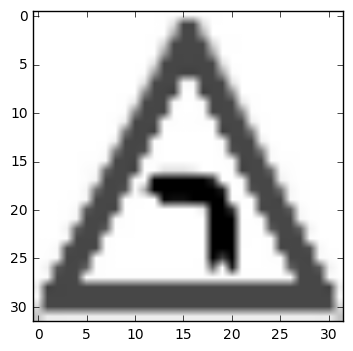

image # 2


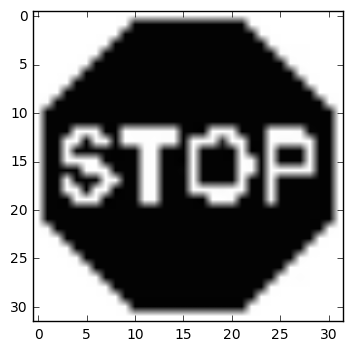

image # 3


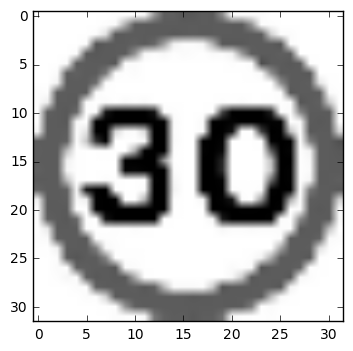

image # 4


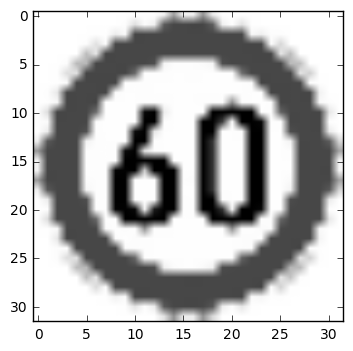

image # 5


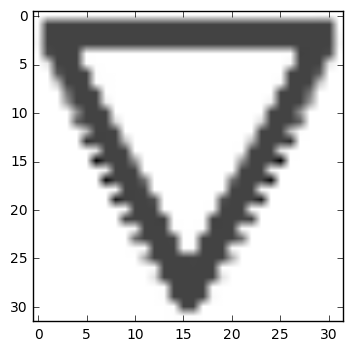

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#reading in an image

# read in 1st image, Curve Left Sign
#convert to Grayscale, then normalize and resize to 32 X 32 X 1
image = plt.imread('./curveleft.jpg')
image = convert_to_grayscale(image)
image = normalize(image)
resized_image = cv2.resize(image, (32, 32)) 
resized_image = resized_image.reshape([32,32,1])

# read in 2nd image, stop sign
#convert to Grayscale, then normalize and resize to 32 X 32 X 1
image2 = plt.imread('./stop.jpg')
image2 = convert_to_grayscale(image2)
image2 = normalize(image2)
resized_image2 = cv2.resize(image2, (32, 32)) 
resized_image2 = resized_image2.reshape([32,32,1])

# read in 3rd image, 30KM sign
#convert to Grayscale, then normalize and resize to 32 X 32 X 1
image3 = plt.imread('./30mph.jpg')
image3 = convert_to_grayscale(image3)
image3 = normalize(image3)
resized_image3 = cv2.resize(image3, (32, 32)) 
resized_image3 = resized_image3.reshape([32,32,1])

# read in 4th image, 60KM sign
#convert to Grayscale, then normalize and resize to 32 X 32 X 1
image4 = plt.imread('./speed60.jpg')
image4 = convert_to_grayscale(image4)
image4 = normalize(image4)
resized_image4 = cv2.resize(image4, (32, 32)) 
resized_image4 = resized_image4.reshape([32,32,1])

# read in 5th image,Yeild sign
#convert to Grayscale, then normalize and resize to 32 X 32 X 1
image5 = plt.imread('./yeild.jpg')
image5 = convert_to_grayscale(image5)
image5 = normalize(image5)
resized_image5 = cv2.resize(image5, (32, 32)) 
resized_image5 = resized_image5.reshape([32,32,1])

# combine the 5 images into 1 test arrary
test= np.stack((resized_image, resized_image2,resized_image3, resized_image4, resized_image5))

# setup 2nd array with the labels for each image
test_y=[19,14,1,3,13]

print('These are the 5 images from the web that we will use to test our model')
print()
for i in range(len(test)):
    print('image #',i+1)
    #print('This image is:', type(test[i]), 'with dimesions:', test[i].shape)
    plt.imshow(test[i].squeeze(), cmap="gray")  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
    plt.show()


### Predict the Sign Type for Each Image

image # 1 is a  Dangerous curve to the left  sign
our model thought that it was a   Dangerous curve to the left  sign
this is correct
our model was  51.3574 % confident in this answer
the #  2  prediction was  Slippery road  with  43.8088 % confidence
the #  3  prediction was  Bicycles crossing  with  28.4168 % confidence
the #  4  prediction was  Wild animals crossing  with  2.98783 % confidence
the #  5  prediction was  Road work  with  -8.1707 % confidence


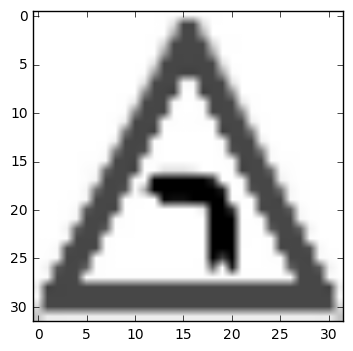

image # 2 is a  Stop  sign
our model thought that it was a   Stop  sign
this is correct
our model was  19.9393 % confident in this answer
the #  2  prediction was  Keep right  with  16.3774 % confidence
the #  3  prediction was  Speed limit (30km/h)  with  12.49 % confidence
the #  4  prediction was  Speed limit (50km/h)  with  7.85062 % confidence
the #  5  prediction was  Yield  with  6.26903 % confidence


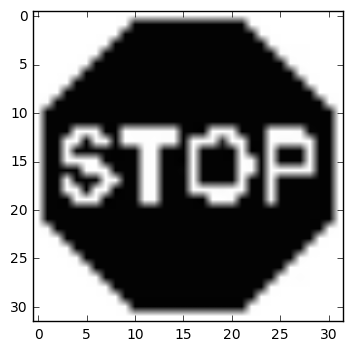

image # 3 is a  Speed limit (30km/h)  sign
our model thought that it was a   Speed limit (60km/h)  sign
this is not correct
our model was  34.8648 % confident in this answer
the #  2  prediction was  Yield  with  19.225 % confidence
the #  3  prediction was  Ahead only  with  13.6714 % confidence
the #  4  prediction was  Speed limit (50km/h)  with  7.8492 % confidence
the #  5  prediction was  Go straight or right  with  -11.1768 % confidence


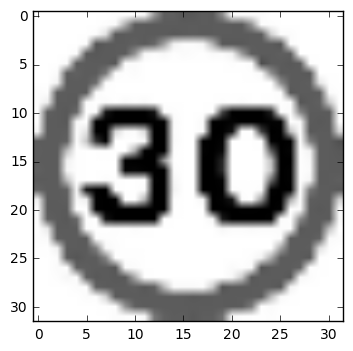

image # 4 is a  Speed limit (60km/h)  sign
our model thought that it was a   Speed limit (60km/h)  sign
this is correct
our model was  39.6349 % confident in this answer
the #  2  prediction was  Speed limit (50km/h)  with  34.866 % confidence
the #  3  prediction was  Speed limit (80km/h)  with  6.26364 % confidence
the #  4  prediction was  Speed limit (30km/h)  with  1.84863 % confidence
the #  5  prediction was  Right-of-way at the next intersection  with  0.862398 % confidence


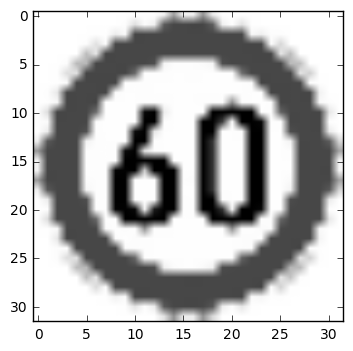

image # 5 is a  Yield  sign
our model thought that it was a   Yield  sign
this is correct
our model was  78.2217 % confident in this answer
the #  2  prediction was  Speed limit (60km/h)  with  33.6447 % confidence
the #  3  prediction was  Speed limit (50km/h)  with  12.2948 % confidence
the #  4  prediction was  Ahead only  with  11.5977 % confidence
the #  5  prediction was  Road work  with  -2.31705 % confidence


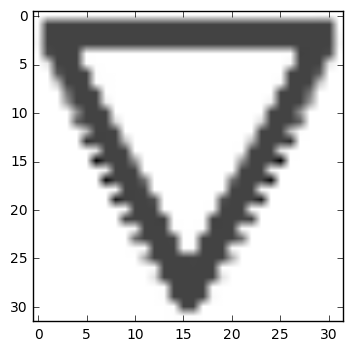

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = 0
    test_accuracy = evaluate(test, test_y)
    top_k = sess.run(top_k_op, feed_dict={x: test, y: test_y})
    
correct_count=0
for i in range(len(test)):
  
    print('image #',i+1, "is a ",sign_labels.values [test_y[i]][1], " sign"  )
    print('our model thought that it was a  ', sign_labels.values[top_k[1][i][0]][1], " sign" )
    if test_y[i] == top_k[1][i][0] :
        print( "this is correct")
        correct_count +=1
    else:
        print( "this is not correct")
    print("our model was ",top_k[0][i][0],"% confident in this answer" )
    for j in range (1,5):
        print('the # ', j+1,' prediction was ', sign_labels.values[top_k[1][i][j]][1]," with ", top_k[0][i][j], "% confidence"  )
    plt.imshow(test[i].squeeze(), cmap="gray")  
    plt.show()


### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#print("This model predicted:  {:.2f}".format(test_accuracy*100),"% of the signs correctly")
# correct_count
print("This model predicted: ", correct_count/len(test_y)*100, "% of the signs correctly")


This model predicted:  80.0 % of the signs correctly


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#see formated predictions in the output above
print(top_k)


TopKV2(values=array([[ 51.35736465,  43.80875015,  28.41680336,   2.98782945,
         -8.17070389],
       [ 19.9392643 ,  16.37736702,  12.48995686,   7.85062456,
          6.26903248],
       [ 34.86481476,  19.22499275,  13.67143631,   7.84919739,
        -11.17679024],
       [ 39.63494873,  34.86601257,   6.2636385 ,   1.84862745,
          0.86239815],
       [ 78.22173309,  33.64465714,  12.29479027,  11.59767532,
         -2.31705093]], dtype=float32), indices=array([[19, 23, 29, 31, 25],
       [14, 38,  1,  2, 13],
       [ 3, 13, 35,  2, 36],
       [ 3,  2,  5,  1, 11],
       [13,  3,  2, 35, 25]]))


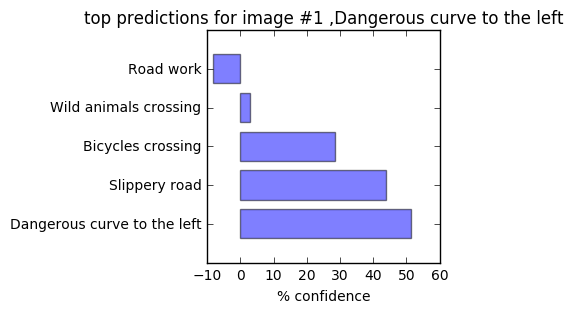

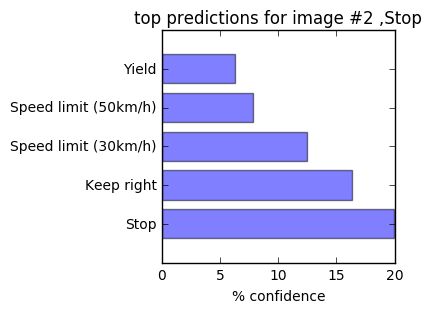

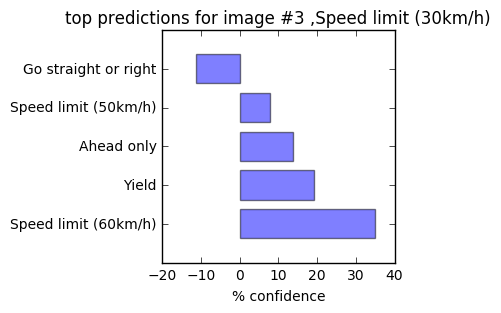

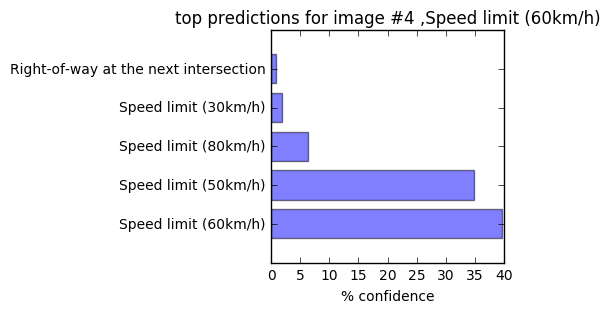

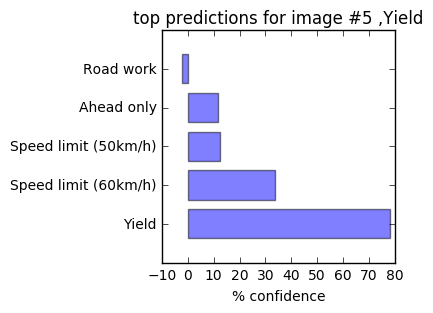

In [14]:


for i in range(5):
    objects=[]
    for j in range (5):
        objects.append( str(sign_labels.values[top_k[1][i][j]][1]))
   
    y_pos = np.arange(len(objects))
    count = top_k[0][i]
    width = 0.75
    fig = plt.figure(figsize=(3,3))

    plt.barh( y_pos,  count, width,  align='center', alpha=0.5)
    plt.yticks(  y_pos, objects)
    plt.xlabel('% confidence')
    title= "top predictions for image #" + str(i+1) + " ,"+str(sign_labels.values[test_y[i]][1])
    plt.title(title)
    plt.show()




> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 